In [ ]:
#### Import Packages

In [8]:
import IPython.display as ipd
import librosa
import librosa.display
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Play Sample File 

In [3]:
ipd.Audio('./Data/03-01-03-01-01-01-01.wav')

#### Read Sample File

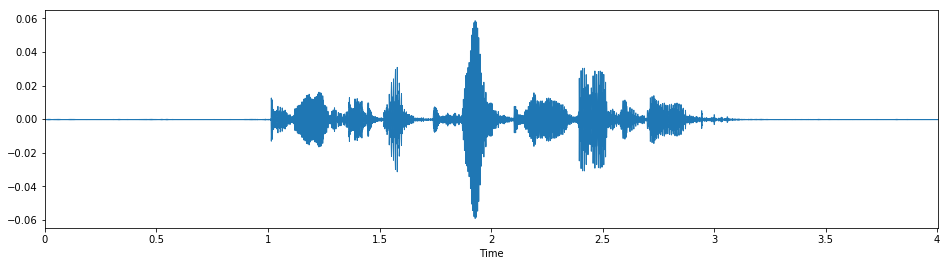

In [38]:
data, sampling_rate = librosa.load('./Data/03-01-03-01-01-01-05.wav')
plt.figure(figsize=(16,4))
librosa.display.waveplot(data, sr=sampling_rate)

#### Visualize Features

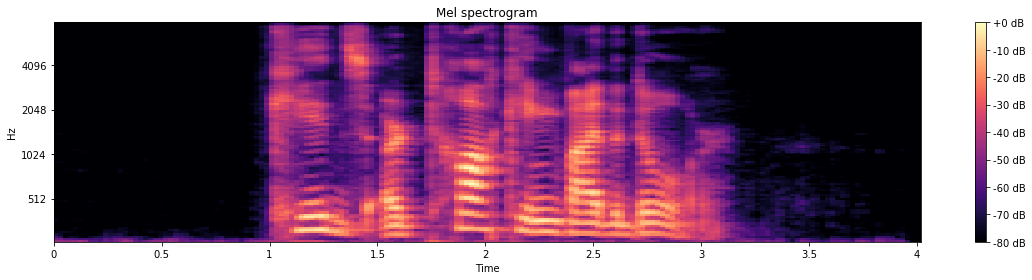

In [61]:
melspectrogram = librosa.feature.melspectrogram(data, sampling_rate, n_mels =120)
plt.figure(figsize=(16,4))
librosa.display.specshow(librosa.power_to_db(melspectrogram, ref=np.max),
                         y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [62]:
melspectrogram.shape

(120, 173)

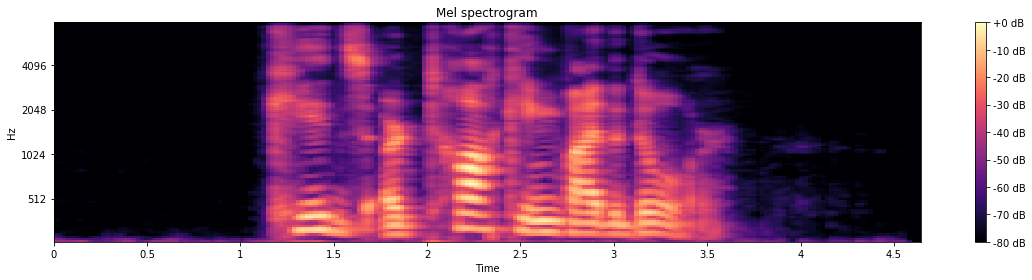

In [65]:
melspectrogram = librosa.feature.melspectrogram(data, sampling_rate)
melspectrogram = cv2.resize(melspectrogram, (200, 120))
plt.figure(figsize=(16,4))
librosa.display.specshow(librosa.power_to_db(melspectrogram, ref=np.max),
                         y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [64]:
melspectrogram.shape

(120, 173)

In [43]:
4*60

240

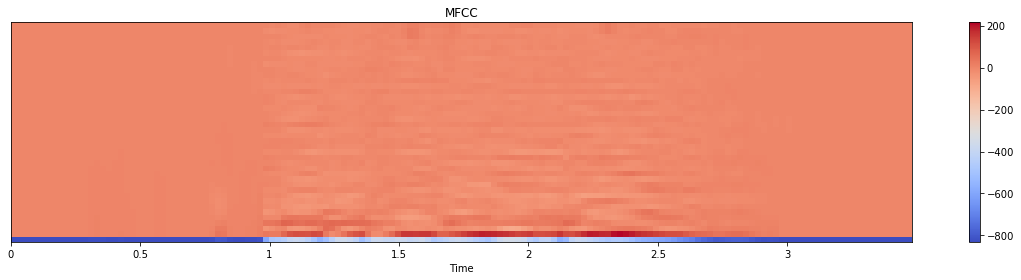

In [24]:
mfcc = librosa.feature.mfcc(data, sampling_rate, n_mfcc=40)
plt.figure(figsize=(16,4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

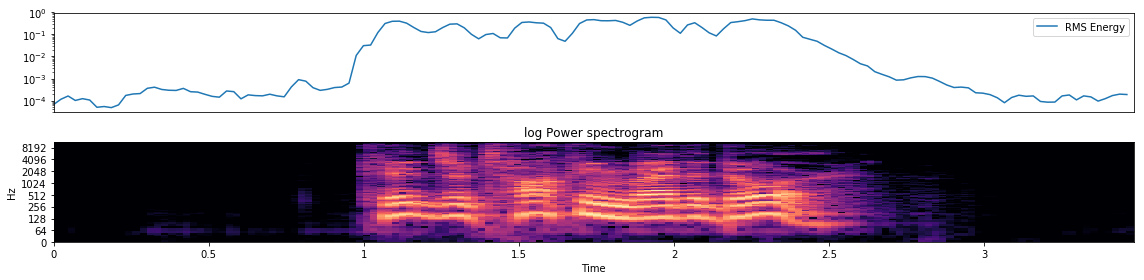

In [32]:
S,phase = librosa.magphase(librosa.stft(data))
rms = librosa.feature.rmse(S=S)
plt.figure(figsize=(16,4))
plt.subplot(2, 1, 1)
plt.semilogy(rms.T, label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.legend(loc='best')
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()